In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tic_tac_toe = pd.read_csv('../../info/tic_tac_toe.txt', header=None)

In [3]:
tic_tac_toe['y'] = tic_tac_toe.iloc[:, -1]
tic_tac_toe = tic_tac_toe.drop(9, axis=1)
tic_tac_toe.head()

,0,1,2,3,4,5,6,7,8,y
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [4]:
len(tic_tac_toe[tic_tac_toe['y'] == 'positive']), len(tic_tac_toe[tic_tac_toe['y'] == 'negative']),

(626, 332)

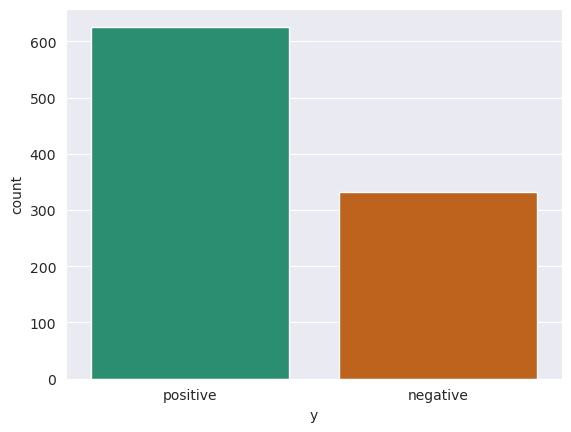

In [5]:
a = sns.countplot(data=tic_tac_toe, x=tic_tac_toe['y'], palette='Dark2');
plt.savefig('report_pictures/countplot.png')

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split   

In [7]:
X = pd.get_dummies(tic_tac_toe.drop('y', axis=1))
y= tic_tac_toe['y']
model = GaussianNB()
X.head()

,0_b,0_o,0_x,1_b,1_o,1_x,2_b,2_o,2_x,3_b,...,5_x,6_b,6_o,6_x,7_b,7_o,7_x,8_b,8_o,8_x
0,False,False,True,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
1,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
2,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
3,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
4,False,False,True,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False


In [8]:
cross_val_predicts = cross_val_predict(model, X, y, cv=332)
print(classification_report(y, cross_val_predicts))

              precision    recall  f1-score   support

    negative       0.52      0.47      0.49       332
    positive       0.73      0.77      0.75       626

    accuracy                           0.66       958
   macro avg       0.63      0.62      0.62       958
weighted avg       0.66      0.66      0.66       958


In [9]:
confusion_matrix(y, cross_val_predicts)

array([[156, 176],
       [145, 481]])

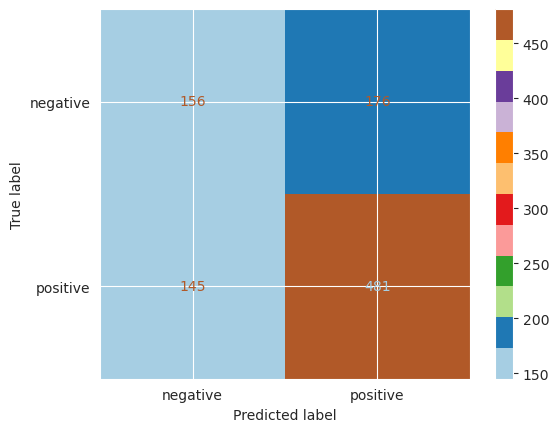

In [10]:
ConfusionMatrixDisplay.from_predictions(y, cross_val_predicts, cmap='Paired')

In [11]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score

accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
w1 = len(tic_tac_toe[tic_tac_toe['y'] == 'positive'])
w2 = len(tic_tac_toe[tic_tac_toe['y'] == 'negative'])
model = GaussianNB()
def run_model(model, test_size, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, preds))
    precision_scores.append(precision_score(y_test, preds, pos_label='negative'))
    f1_scores.append(f1_score(y_test, preds, pos_label='negative'))
    recall_scores.append(recall_score(y_test, preds, pos_label='positive'))
    cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    cm.figure_.savefig(f'report_pictures/confusion_matrix{np.round(test_size, 2)}.png')
    rc = RocCurveDisplay.from_estimator(model, X_test, y_test, color='purple')
    rc.figure_.savefig(f'report_pictures/roc{np.round(test_size, 2)}.png')
    print(classification_report(y_test, preds))

Test size = 0.10
GaussianB:
              precision    recall  f1-score   support

    negative       0.52      0.37      0.43        35
    positive       0.69      0.80      0.74        61

    accuracy                           0.65        96
   macro avg       0.61      0.59      0.59        96
weighted avg       0.63      0.65      0.63        96

Test size = 0.20
GaussianB:
              precision    recall  f1-score   support

    negative       0.56      0.49      0.52        67
    positive       0.74      0.79      0.77       125

    accuracy                           0.69       192
   macro avg       0.65      0.64      0.65       192
weighted avg       0.68      0.69      0.68       192

Test size = 0.30
GaussianB:
              precision    recall  f1-score   support

    negative       0.49      0.54      0.51        95
    positive       0.76      0.72      0.74       193

    accuracy                           0.66       288
   macro avg       0.62      0.63      0.62 

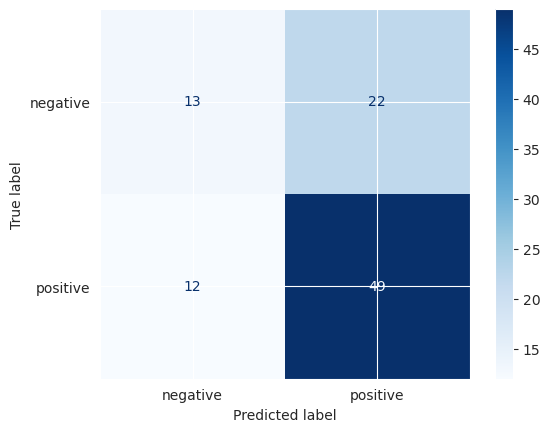

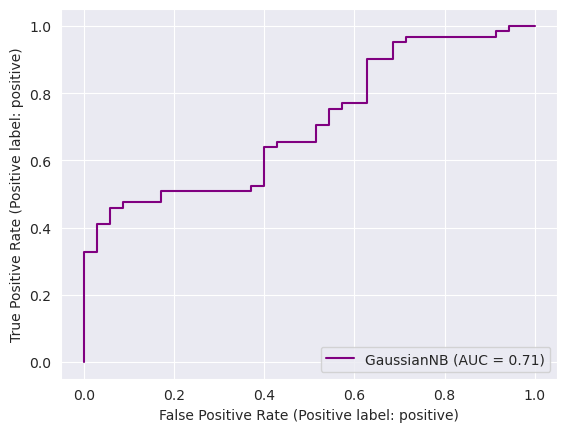

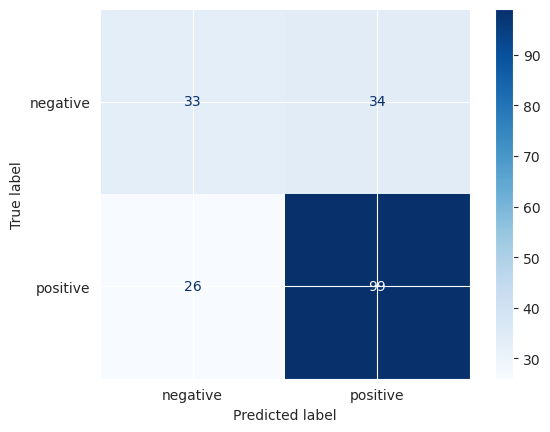

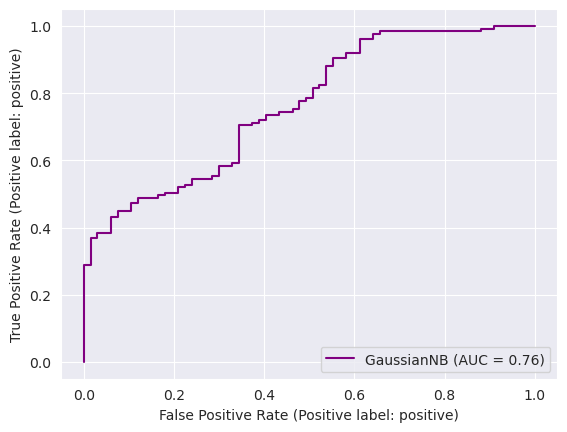

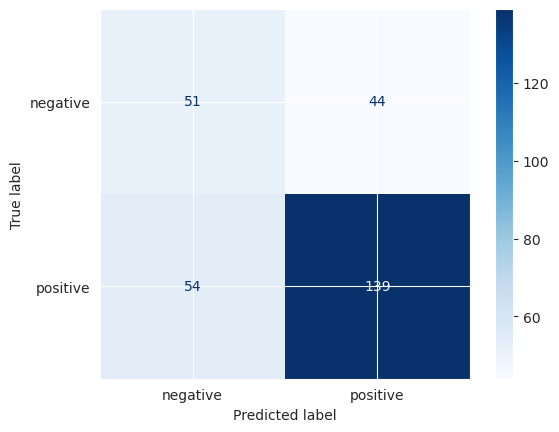

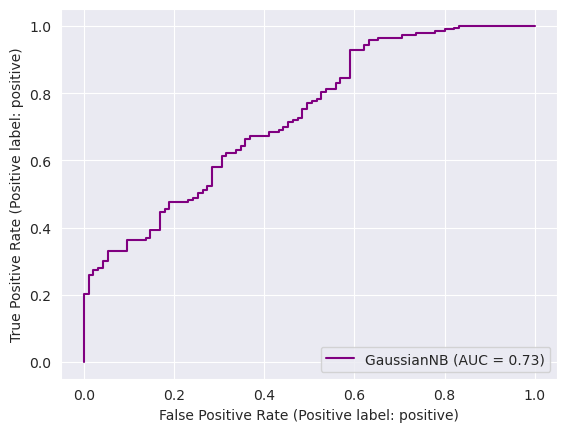

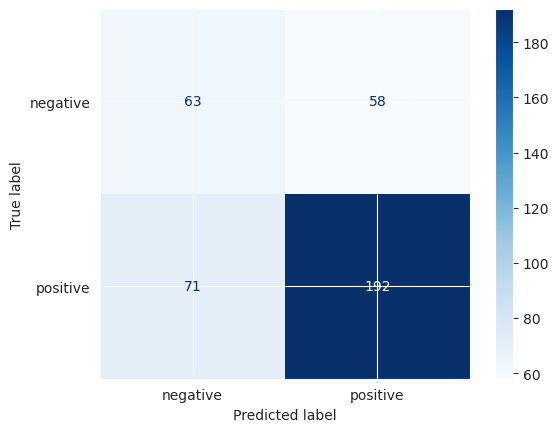

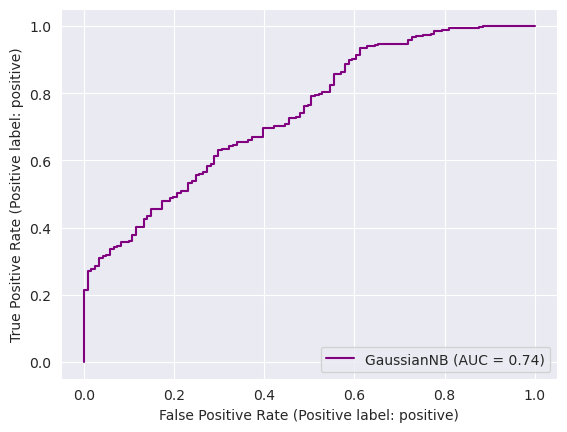

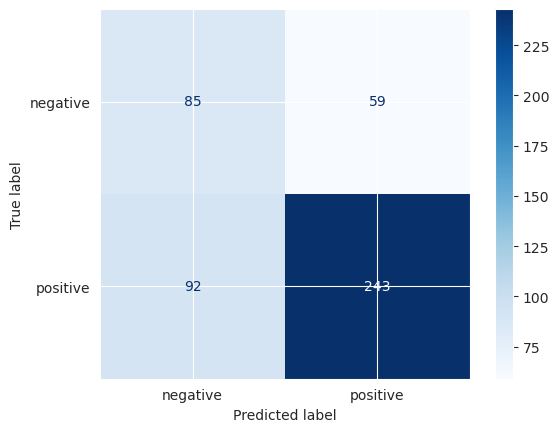

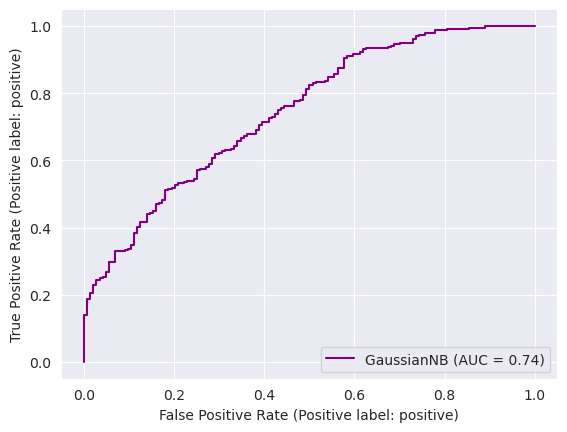

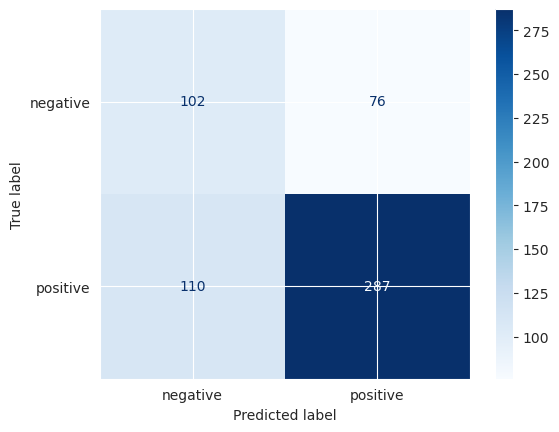

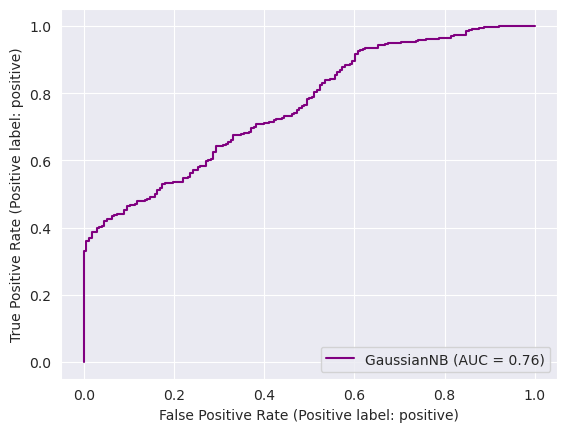

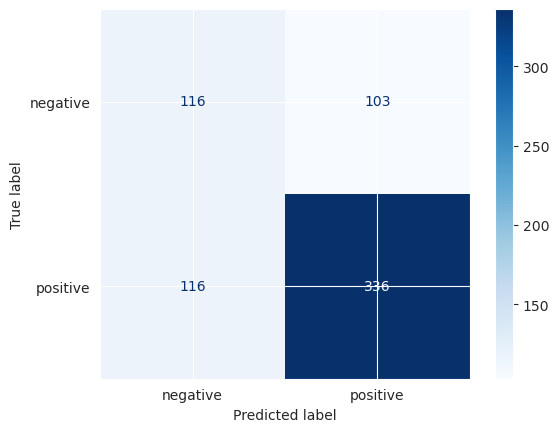

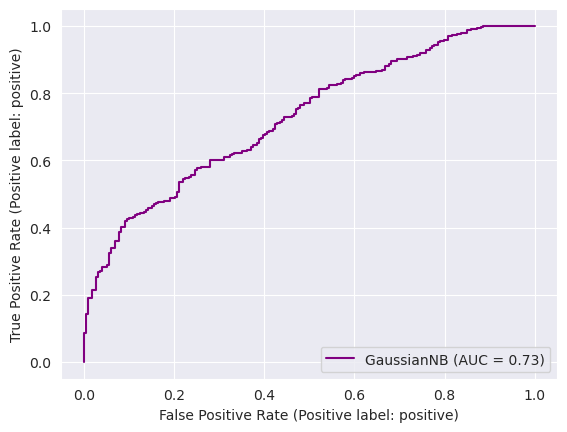

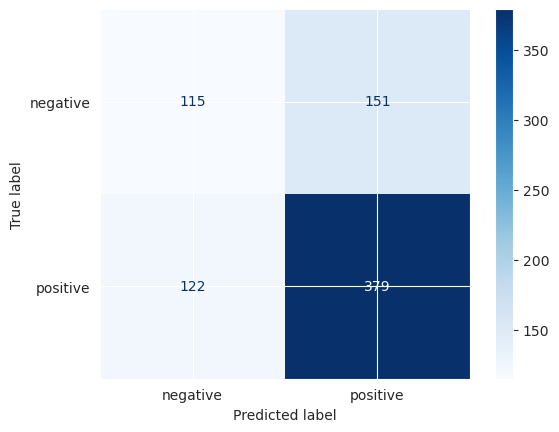

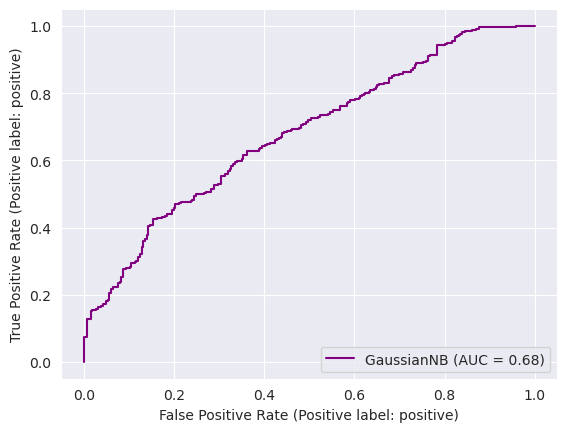

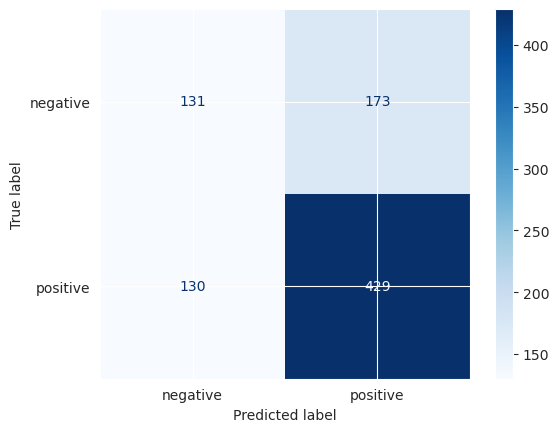

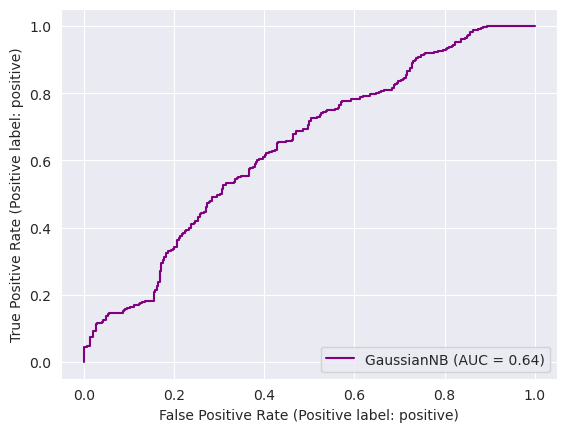

In [12]:
test_range = np.arange(0.1, 1.0, 0.1)
for i in test_range:
    print(f"Test size = {i:.2f}\nGaussianB:")
    run_model(model, i, X, y)

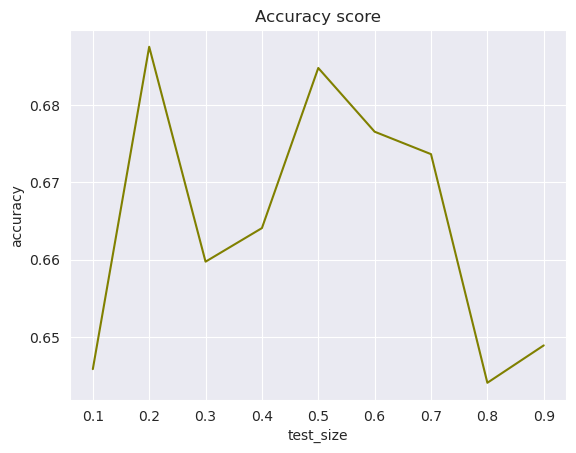

In [13]:
plt.title('Accuracy score')
plt.plot(test_range, accuracy_scores, color='olive')
plt.xlabel('test_size')
plt.ylabel('accuracy');
plt.savefig('report_pictures/Accuracy_tic_tac_toe.png')

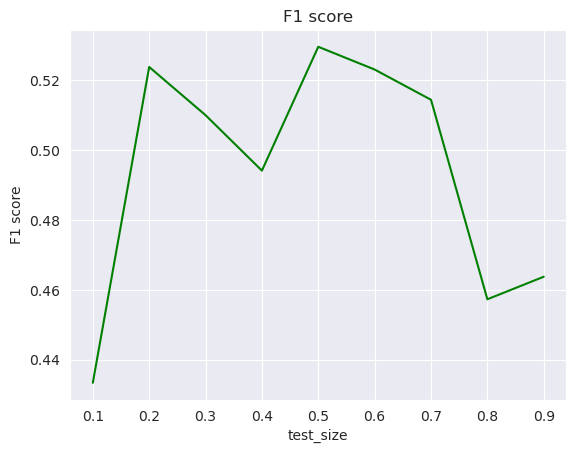

In [14]:
plt.title('F1 score')
plt.plot(test_range, f1_scores, color='green')
plt.xlabel('test_size')
plt.ylabel('F1 score')
plt.savefig('report_pictures/F1_tic_tac_toe.png')

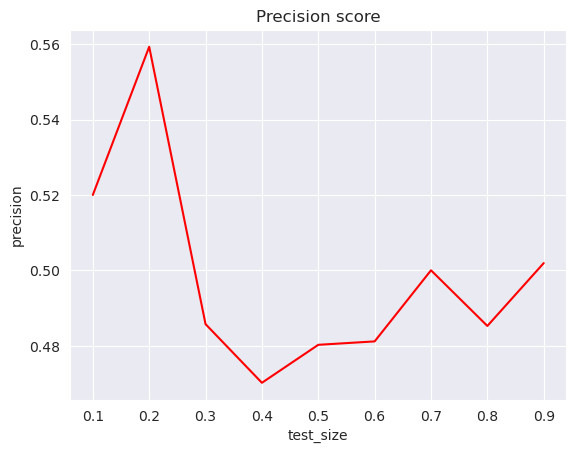

In [15]:
plt.title('Precision score')
plt.plot(test_range, precision_scores, color='red')
plt.xlabel('test_size')
plt.ylabel('precision');
plt.savefig('report_pictures/Precision_tic_tac_toe.png')

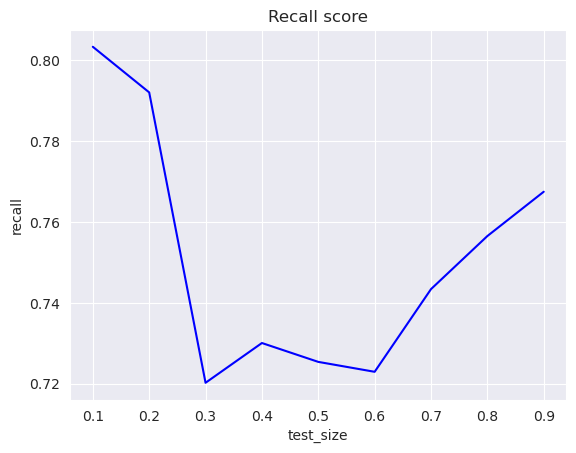

In [16]:
plt.title('Recall score')
plt.plot(test_range, recall_scores, color='Blue')
plt.xlabel('test_size')
plt.ylabel('recall');
plt.savefig('report_pictures/Recall_tic_tac_toe.png')

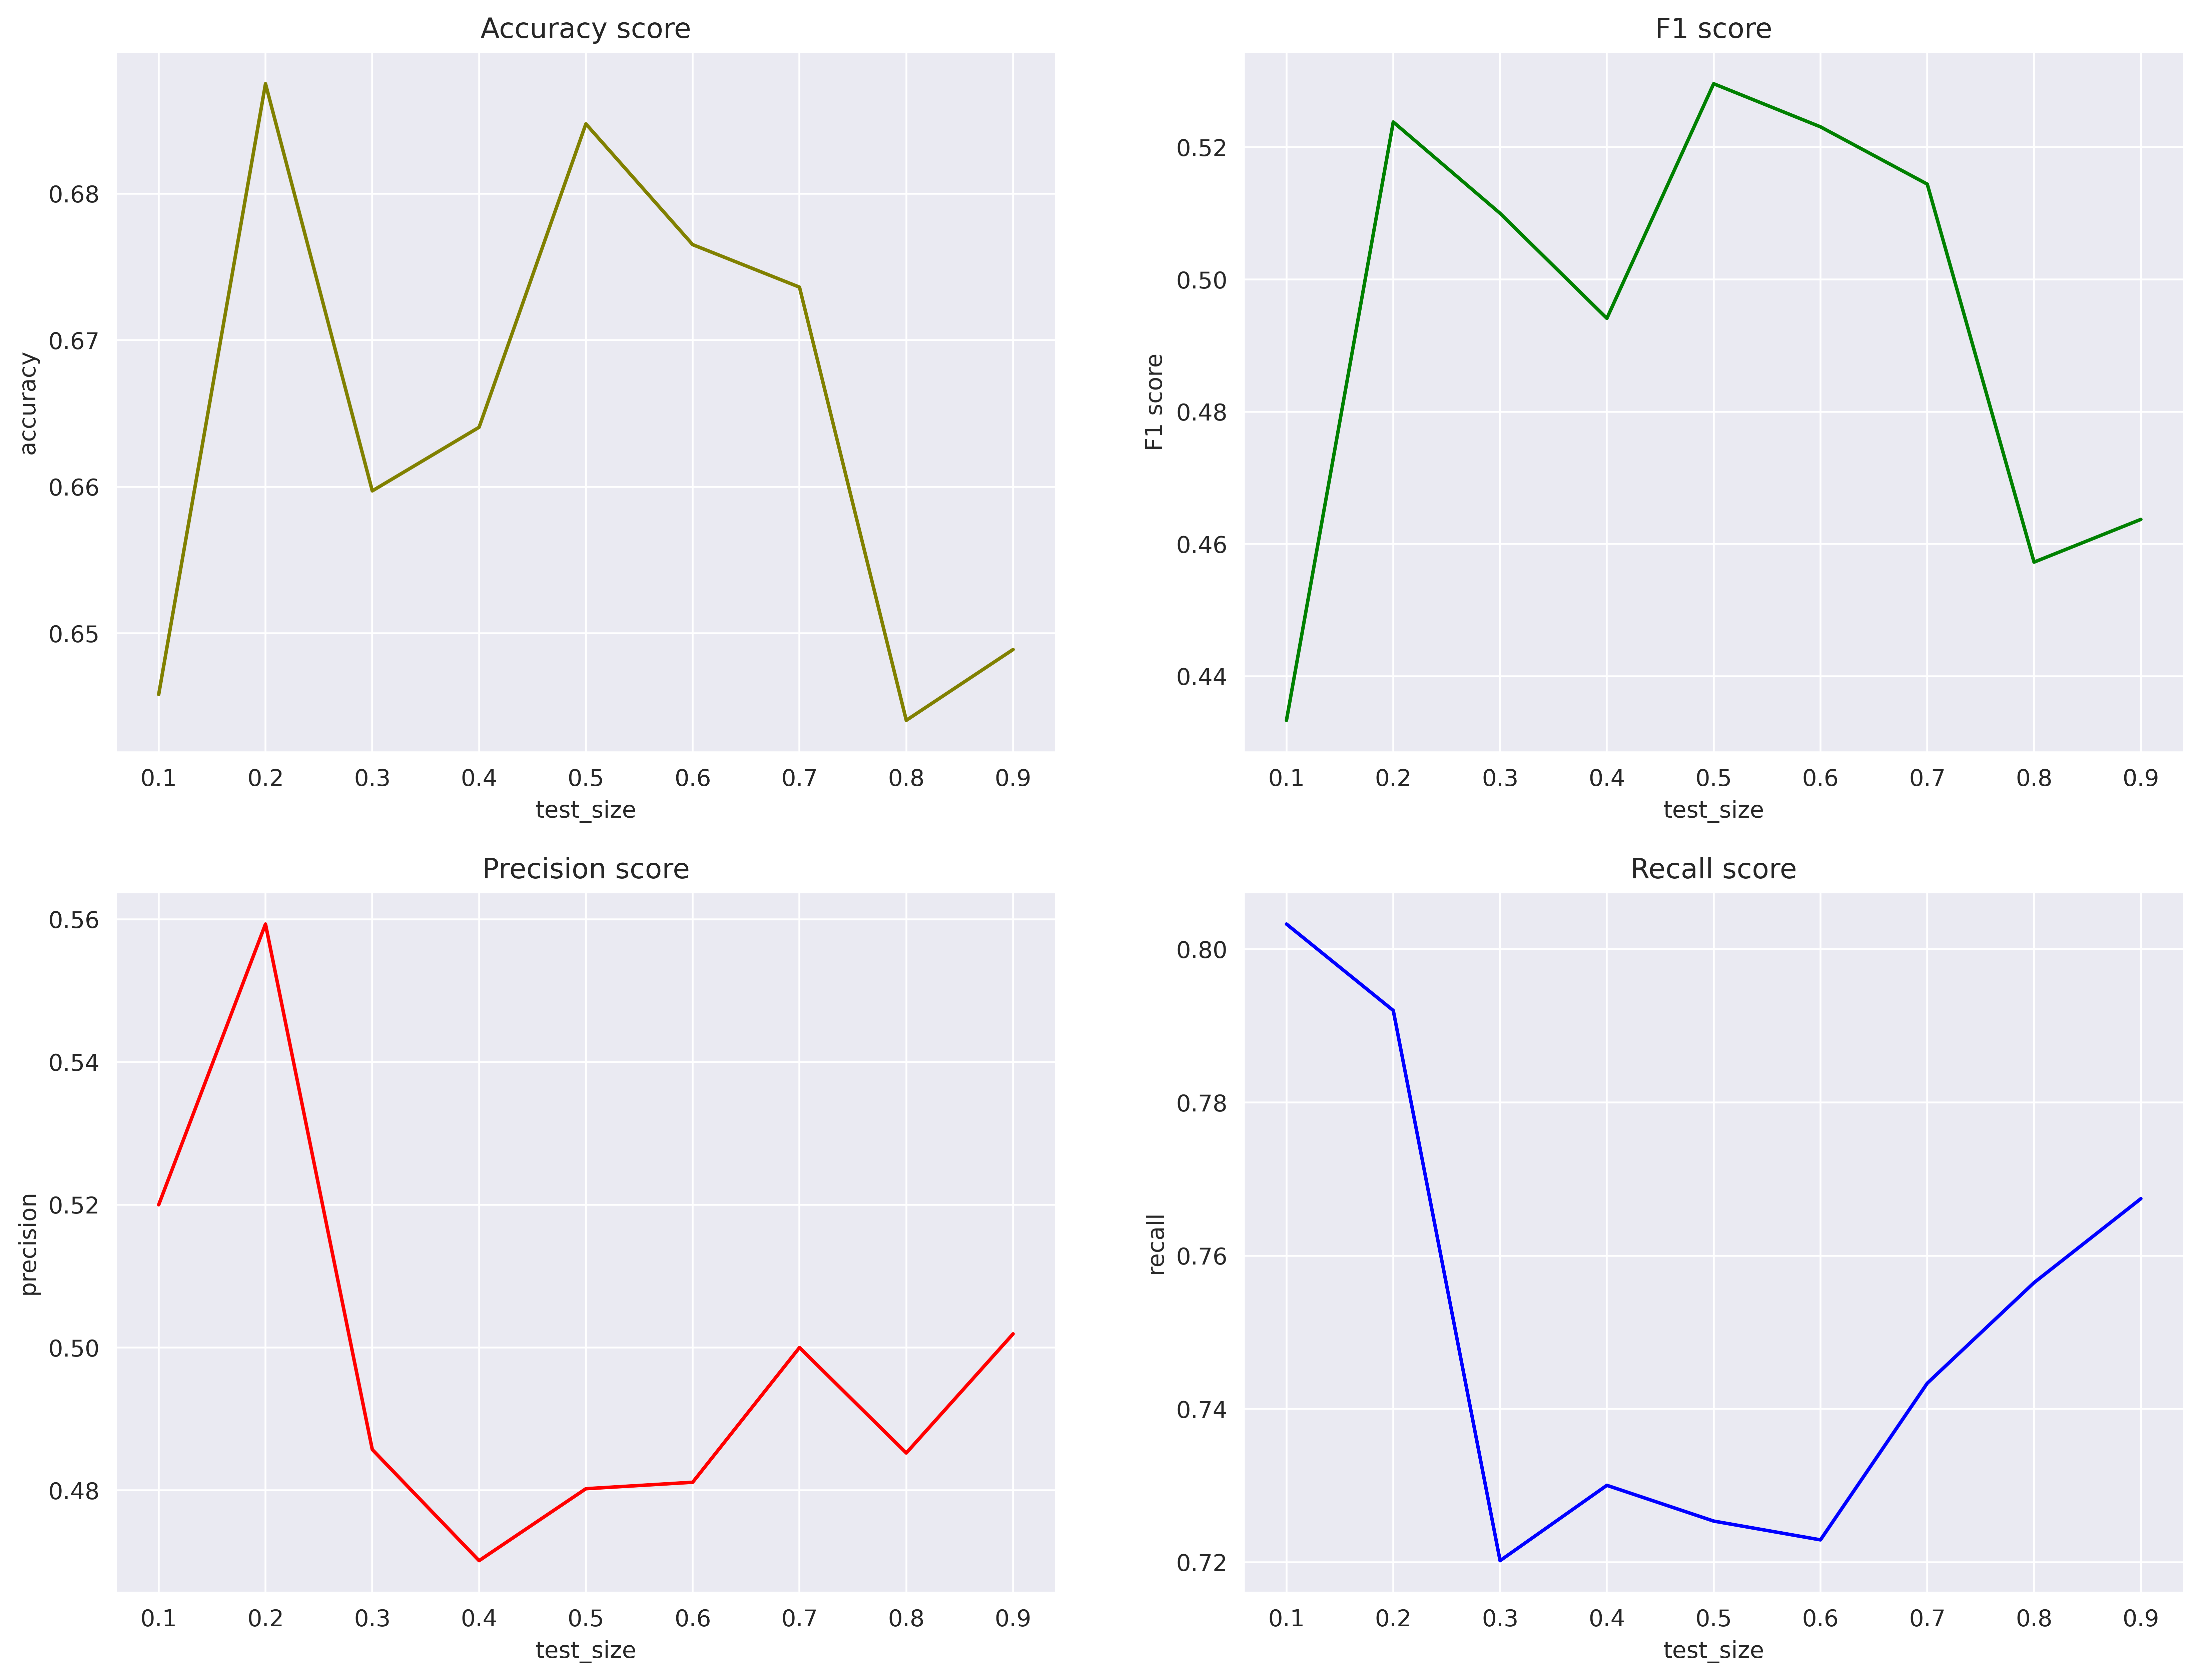

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12), dpi=500)
ax[0, 0].set_title('Accuracy score')
ax[0, 0].plot(test_range, accuracy_scores, color='olive')
ax[0, 0].set_xlabel('test_size')
ax[0, 0].set_ylabel('accuracy')

ax[0, 1].set_title('F1 score')
ax[0, 1].plot(test_range, f1_scores, color='green')
ax[0, 1].set_xlabel('test_size')
ax[0, 1].set_ylabel('F1 score')

ax[1, 0].set_title('Precision score')
ax[1, 0].plot(test_range, precision_scores, color='red')
ax[1, 0].set_xlabel('test_size')
ax[1, 0].set_ylabel('precision')

ax[1, 1].set_title('Recall score')
ax[1, 1].plot(test_range, recall_scores, color='blue')
ax[1, 1].set_xlabel('test_size')
ax[1, 1].set_ylabel('recall')

fig.savefig('report_pictures/subplot_tic_tac_toe.png')